<a href="https://colab.research.google.com/github/Sagargomad/My_projects/blob/main/CNN_network_from_scratch_using_tensorflow_on_transformed_data%2Con_Fashion_MNIST_Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import random
from itertools import zip_longest
import tensorflow as tf
import visualkeras
from tensorflow.keras.utils import plot_model
import pandas as pd
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adagrad
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
#Converting the image file into numpy_array which is present in hexadecimal format.
#Magic number tells whether it is image or label

import os,codecs,numpy


datapath = 'C:\\Users\\91703\\Desktop\\Quantiphi\\Assignment_2\\'

files = os.listdir(datapath)


def get_int(b):
    #return int(codecs.encode(b, 'hex'), 16) #This code and below code are same
    return int.from_bytes(b, byteorder='big')


data_dict = {}
for file in files:
    if file.endswith('ubyte'):
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            type1 = get_int(data[:4])   # 0-3: THE MAGIC NUMBER TO WHETHER IMAGE OR LABEL
            length = get_int(data[4:8])  # 4-7: LENGTH OF THE ARRAY  (DIMENSION 0)
            if (type1 == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])
                num_cols = get_int(data[12:16])
                parsed = numpy.frombuffer(data,dtype = numpy.uint8, offset = 16)
                parsed = parsed.reshape(length,num_rows,num_cols)
            elif(type1 == 2049):
                category = 'labels'
                parsed = numpy.frombuffer(data, dtype=numpy.uint8, offset=8)
                parsed = parsed.reshape(length,1)
            if (length==10000):
                set1 = 'test'
            elif (length==60000):
                set1= 'train'
            data_dict[set1+'_'+category] = parsed

Reading  t10k-images-idx3-ubyte
Reading  t10k-labels-idx1-ubyte
Reading  train-images-idx3-ubyte
Reading  train-labels-idx1-ubyte


In [ ]:
test_images=data_dict['test_images']
test_labels=data_dict['test_labels']
train_images=data_dict['train_images']
train_labels=data_dict['train_labels']

In [ ]:
test_labels

array([[9],
       [2],
       [1],
       ...,
       [8],
       [1],
       [5]], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

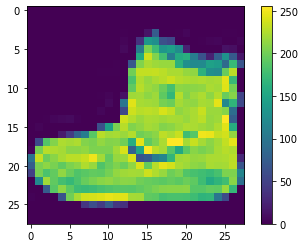

In [ ]:
"""
plt.imshow() is a function from the Matplotlib library in Python, which
is commonly used for data visualization. This function is specifically used to display an image
or a 2D array as an image.
"""
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
"""
Scale these values to a range of 0 to 1 before feeding them to the neural network model.
To do so, divide the values by 255. It's important that the training set and the testing
set be preprocessed in the same way:
"""
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images / 255.0

In [ ]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

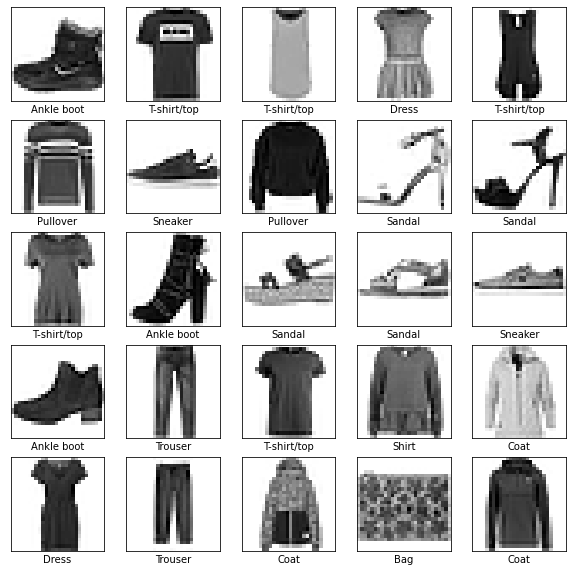

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
LAYERS = [
    tf.keras.layers.Conv2D(16, (3,3),padding='same', activation='relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3,3),strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
]

In [ ]:
model = tf.keras.models.Sequential(layers= LAYERS)

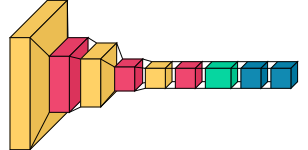

In [ ]:
visualkeras.layered_view(model)

In [ ]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_93 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_94 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_94 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_95 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_95 (MaxPooli  (None, 2, 2, 64)        

In [ ]:
#To calculate_parameters for conv2d
#(only one input channel)1*3*3(This is filter size)*32(Number of filters)+32(Number of biases which is same as number of filters)


In [ ]:
#optimizer = [SGD(learning_rate=0.01),Adam(learning_rate=0.001),RMSprop(learning_rate=0.001),Adagrad(learning_rate=0.01)]

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Split the training dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

In [ ]:
EPOCHS = 5
history = model.fit(train_images, train_labels,epochs=EPOCHS,validation_data=(val_images, val_labels))


Epoch 1/5
1500/1500 [==============================] - 16s 9ms/step - loss: 0.5423 - accuracy: 0.8051 - val_loss: 0.3910 - val_accuracy: 0.8587
Epoch 2/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3560 - accuracy: 0.8711 - val_loss: 0.3330 - val_accuracy: 0.8776
Epoch 3/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3064 - accuracy: 0.8890 - val_loss: 0.3092 - val_accuracy: 0.8864
Epoch 4/5
1500/1500 [==============================] - 16s 10ms/step - loss: 0.2785 - accuracy: 0.8977 - val_loss: 0.2922 - val_accuracy: 0.8906
Epoch 5/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2555 - accuracy: 0.9060 - val_loss: 0.3173 - val_accuracy: 0.8851


In [ ]:
print(history)

In [ ]:
print(history.history)

{'loss': [0.5422531366348267, 0.355973482131958, 0.30641934275627136, 0.2784537374973297, 0.25548896193504333], 'accuracy': [0.805062472820282, 0.8711458444595337, 0.8889583349227905, 0.8976874947547913, 0.9060208201408386], 'val_loss': [0.39099347591400146, 0.3329760730266571, 0.309159517288208, 0.29224422574043274, 0.3173181414604187], 'val_accuracy': [0.8587499856948853, 0.8775833249092102, 0.8864166736602783, 0.890583336353302, 0.8850833177566528]}


In [ ]:
print(model.fit)

<bound method Model.fit of <keras.src.engine.sequential.Sequential object at 0x000002D0843EC4C0>>


In [ ]:
hs = pd.DataFrame(history.history)
hs.head()

,loss,accuracy,val_loss,val_accuracy
0,0.542253,0.805062,0.390993,0.858750
1,0.355973,0.871146,0.332976,0.877583
2,0.306419,0.888958,0.309160,0.886417
3,0.278454,0.897687,0.292244,0.890583
4,0.255489,0.906021,0.317318,0.885083


In [ ]:
hs['loss'][3]

0.2784537374973297

<AxesSubplot:>

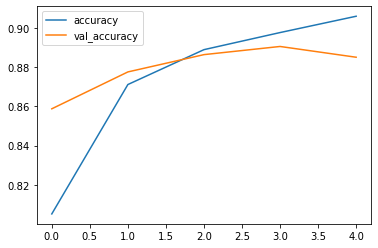

In [ ]:
hs[['accuracy','val_accuracy']].plot()


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.3266 - accuracy: 0.8797
Test accuracy: 87.97%


In [ ]:
hs = pd.DataFrame(history.history)
hs.head()

,loss,accuracy,val_loss,val_accuracy
0,0.542253,0.805062,0.390993,0.858750
1,0.355973,0.871146,0.332976,0.877583
2,0.306419,0.888958,0.309160,0.886417
3,0.278454,0.897687,0.292244,0.890583
4,0.255489,0.906021,0.317318,0.885083


In [ ]:
#Saving the model with highest accuracy
model.save("C:\\Users\\91703\\Desktop\\Quantiphi\\Assignment_2\\CNN_fashion_mnist_1.keras")

# CNN with Data Augmentation

In [ ]:
#Converting the image file into numpy_array which is present in hexadecimal format.
#Magic number tells whether it is image or label

import os,codecs,numpy


datapath = 'C:\\Users\\91703\\Desktop\\Quantiphi\\Assignment_2\\'

files = os.listdir(datapath)


def get_int(b):
    #return int(codecs.encode(b, 'hex'), 16) #This code and below code are same
    return int.from_bytes(b, byteorder='big')


data_dict = {}
for file in files:
    if file.endswith('ubyte'):
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            type1 = get_int(data[:4])   # 0-3: THE MAGIC NUMBER TO WHETHER IMAGE OR LABEL
            length = get_int(data[4:8])  # 4-7: LENGTH OF THE ARRAY  (DIMENSION 0)
            if (type1 == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])
                num_cols = get_int(data[12:16])
                parsed = numpy.frombuffer(data,dtype = numpy.uint8, offset = 16)
                parsed = parsed.reshape(length,num_rows,num_cols)
            elif(type1 == 2049):
                category = 'labels'
                parsed = numpy.frombuffer(data, dtype=numpy.uint8, offset=8)
                parsed = parsed.reshape(length,1)
            if (length==10000):
                set1 = 'test'
            elif (length==60000):
                set1= 'train'
            data_dict[set1+'_'+category] = parsed

Reading  t10k-images-idx3-ubyte
Reading  t10k-labels-idx1-ubyte
Reading  train-images-idx3-ubyte
Reading  train-labels-idx1-ubyte


In [ ]:
test_images=data_dict['test_images']
test_labels=data_dict['test_labels']
train_images=data_dict['train_images']
train_labels=data_dict['train_labels']

In [ ]:
"""
Scale these values to a range of 0 to 1 before feeding them to the neural network model.
To do so, divide the values by 255. It's important that the training set and the testing
set be preprocessed in the same way:
"""
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images / 255.0

In [ ]:
AUG_LAYERS = [
    tf.keras.layers.RandomFlip(mode='horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.05)
    ]

In [ ]:
aug_data = tf.keras.Sequential(AUG_LAYERS)

In [ ]:
p=train_images[0]

In [ ]:
aug_data(p).shape


TensorShape([28, 28, 1])

In [ ]:
aug_data(p).numpy().shape

(28, 28, 1)

In [ ]:
image = train_images[100]
print(image.shape)

(28, 28, 1)


In [ ]:
#If we don't use this also then also our code will run with no problem as it is just adding one more dimension to our data
#by adding 1 at the starting
#Use 164 and 165 line of code block only when our sequential give error regarding shape of data
#image = tf.cast(tf.expand_dims(image, 0), tf.float32)
#print(image.shape)

In [ ]:
#If we want to change it back we can use
#z=tf.cast(tf.squeeze(image, 0), tf.float32)
#print(z.shape)

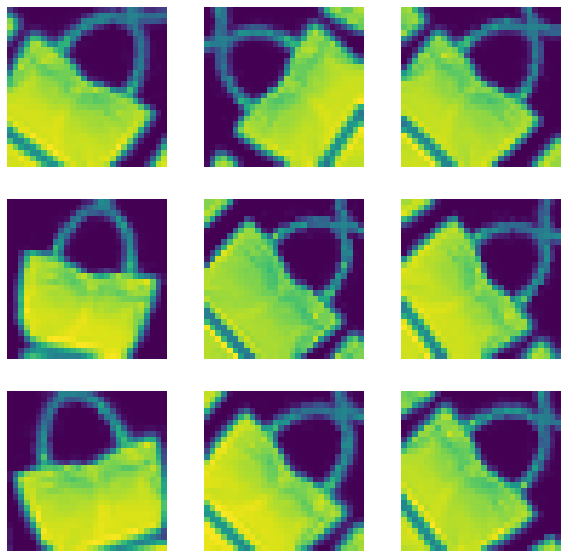

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    aug_image = aug_data(image)
    axes = plt.subplot(3,3,i+1)
    plt.imshow(aug_data(image).numpy().reshape(28,28))
    plt.axis("off")

In [ ]:
input_shape = (28, 28, 1)

In [ ]:
LAYERS_1 = [
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.RandomFlip(mode='horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.05),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3),strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
]

In [ ]:
model_1 = tf.keras.models.Sequential(layers= LAYERS_1)

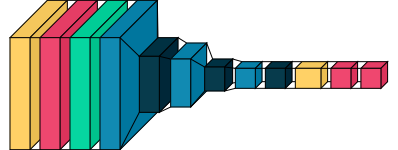

In [ ]:
visualkeras.layered_view(model_1)

In [ ]:
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Split the training dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

In [ ]:
EPOCHS = 5
history_1 = model_1.fit(train_images, train_labels,epochs=EPOCHS,validation_data=(val_images, val_labels))

Epoch 1/5
1500/1500 [==============================] - 19s 12ms/step - loss: 0.9715 - accuracy: 0.6454 - val_loss: 0.6760 - val_accuracy: 0.7579
Epoch 2/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.6834 - accuracy: 0.7486 - val_loss: 0.6143 - val_accuracy: 0.7772
Epoch 3/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.6089 - accuracy: 0.7770 - val_loss: 0.5491 - val_accuracy: 0.8023
Epoch 4/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.5665 - accuracy: 0.7915 - val_loss: 0.5131 - val_accuracy: 0.8112
Epoch 5/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.5344 - accuracy: 0.8054 - val_loss: 0.4858 - val_accuracy: 0.8294


In [ ]:
hs = pd.DataFrame(history_1.history)
hs.head()

,loss,accuracy,val_loss,val_accuracy
0,0.971549,0.645354,0.676013,0.757917
1,0.683434,0.748625,0.614308,0.777167
2,0.608890,0.777021,0.549095,0.802250
3,0.566479,0.791458,0.513095,0.811167
4,0.534370,0.805375,0.485757,0.829417


<AxesSubplot:>

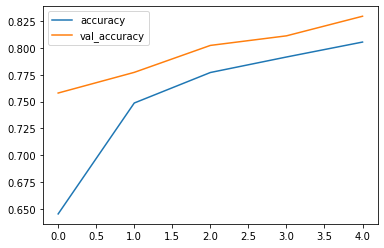

In [ ]:
hs[['accuracy','val_accuracy']].plot()

In [ ]:
test_loss, test_acc = model_1.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.5180 - accuracy: 0.8198
Test accuracy: 81.98%


In [ ]:
#Saving the model with highest accuracy
model_1.save("C:\\Users\\91703\\Desktop\\Quantiphi\\Assignment_2\\CNN_fashion_mnist_2.keras")

# Augmentation with callbacks

In [ ]:
#Converting the image file into numpy_array which is present in hexadecimal format.
#Magic number tells whether it is image or label

import os,codecs,numpy


datapath = 'C:\\Users\\91703\\Desktop\\Quantiphi\\Assignment_2\\'

files = os.listdir(datapath)


def get_int(b):
    #return int(codecs.encode(b, 'hex'), 16) #This code and below code are same
    return int.from_bytes(b, byteorder='big')


data_dict = {}
for file in files:
    if file.endswith('ubyte'):
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            type1 = get_int(data[:4])   # 0-3: THE MAGIC NUMBER TO WHETHER IMAGE OR LABEL
            length = get_int(data[4:8])  # 4-7: LENGTH OF THE ARRAY  (DIMENSION 0)
            if (type1 == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])
                num_cols = get_int(data[12:16])
                parsed = numpy.frombuffer(data,dtype = numpy.uint8, offset = 16)
                parsed = parsed.reshape(length,num_rows,num_cols)
            elif(type1 == 2049):
                category = 'labels'
                parsed = numpy.frombuffer(data, dtype=numpy.uint8, offset=8)
                parsed = parsed.reshape(length,1)
            if (length==10000):
                set1 = 'test'
            elif (length==60000):
                set1= 'train'
            data_dict[set1+'_'+category] = parsed

Reading  t10k-images-idx3-ubyte
Reading  t10k-labels-idx1-ubyte
Reading  train-images-idx3-ubyte
Reading  train-labels-idx1-ubyte


In [ ]:
test_images=data_dict['test_images']
test_labels=data_dict['test_labels']
train_images=data_dict['train_images']
train_labels=data_dict['train_labels']

In [ ]:
"""
Scale these values to a range of 0 to 1 before feeding them to the neural network model.
To do so, divide the values by 255. It's important that the training set and the testing
set be preprocessed in the same way:
"""
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images / 255.0

In [ ]:
'''LAYERS_2 = [
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.RandomFlip(mode='horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.05),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(32, (3,3),strides=1, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
]'''

"LAYERS_2 = [\n    tf.keras.Input(shape=(28,28,1)),\n    tf.keras.layers.RandomFlip(mode='horizontal'),\n    tf.keras.layers.RandomRotation(0.2),\n    tf.keras.layers.RandomZoom(0.05),\n    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),\n    tf.keras.layers.BatchNormalization(),\n    tf.keras.layers.MaxPooling2D((2,2)),\n    tf.keras.layers.Dropout(0.1),\n    tf.keras.layers.Conv2D(32, (3,3),strides=1, activation='relu'),\n    tf.keras.layers.BatchNormalization(),\n    tf.keras.layers.MaxPooling2D((2, 2)),\n    tf.keras.layers.Dropout(0.1),\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),\n    tf.keras.layers.BatchNormalization(),\n    tf.keras.layers.MaxPooling2D((2, 2)),\n    tf.keras.layers.Dropout(0.1),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(64, activation='relu'),\n    tf.keras.layers.BatchNormalization(),\n    tf.keras.layers.Dropout(0.1),\n    tf.keras.layers.Dense(10, activation='softmax')\n]"

In [ ]:
#Here dropout is before max pool
LAYERS_2 = [
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.RandomFlip(mode='horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.05),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3),strides=1, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
]

In [ ]:
model_2 = tf.keras.models.Sequential(layers= LAYERS_2)

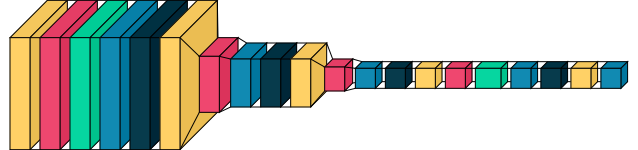

In [ ]:
visualkeras.layered_view(model_2)

In [ ]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.2, patience=3, min_lr=0.01)

In [ ]:
early_stop_cb = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3,restore_best_weights=False)

In [ ]:
# Split the training dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

In [ ]:
'''EPOCHS = 5
history_2 = model_2.fit(train_images, train_labels,epochs=EPOCHS, callbacks = [reduce_lr, early_stop_cb],validation_data=(val_images, val_labels))'''

Epoch 1/5
1500/1500 [==============================] - 28s 18ms/step - loss: 0.9659 - accuracy: 0.6563 - val_loss: 0.7738 - val_accuracy: 0.7218 - lr: 0.0010
Epoch 2/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.7089 - accuracy: 0.7425 - val_loss: 0.5677 - val_accuracy: 0.7972 - lr: 0.0010
Epoch 3/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.6317 - accuracy: 0.7718 - val_loss: 0.6206 - val_accuracy: 0.7679 - lr: 0.0010
Epoch 4/5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.5925 - accuracy: 0.7871 - val_loss: 0.4649 - val_accuracy: 0.8277 - lr: 0.0010
Epoch 5/5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.5661 - accuracy: 0.7934 - val_loss: 0.4596 - val_accuracy: 0.8302 - lr: 0.0010


In [ ]:
EPOCHS = 5
history_2 = model_2.fit(train_images, train_labels,epochs=EPOCHS, callbacks = [reduce_lr, early_stop_cb],validation_data=(val_images, val_labels))

Epoch 1/5
1500/1500 [==============================] - 27s 17ms/step - loss: 0.8968 - accuracy: 0.6815 - val_loss: 0.5971 - val_accuracy: 0.7804 - lr: 0.0010
Epoch 2/5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.6634 - accuracy: 0.7615 - val_loss: 0.5423 - val_accuracy: 0.7977 - lr: 0.0010
Epoch 3/5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.5977 - accuracy: 0.7824 - val_loss: 0.4910 - val_accuracy: 0.8219 - lr: 0.0010
Epoch 4/5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.5502 - accuracy: 0.8010 - val_loss: 0.5525 - val_accuracy: 0.8008 - lr: 0.0010
Epoch 5/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.5259 - accuracy: 0.8086 - val_loss: 0.4459 - val_accuracy: 0.8378 - lr: 0.0010


In [ ]:
hs = pd.DataFrame(history_2.history)
hs.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.896791,0.681479,0.597076,0.780417,0.001
1,0.663384,0.761458,0.542344,0.797667,0.001
2,0.597682,0.782438,0.491037,0.821917,0.001
3,0.550186,0.800958,0.552521,0.800750,0.001
4,0.525861,0.808625,0.445905,0.837833,0.001


<AxesSubplot:>

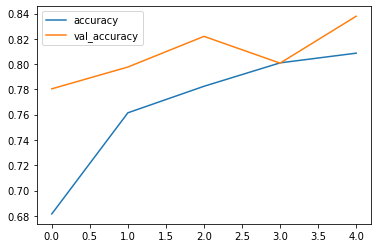

In [ ]:
hs[['accuracy','val_accuracy']].plot()

In [ ]:
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.4667 - accuracy: 0.8340
Test accuracy: 83.40%


In [ ]:
#Saving the model with highest accuracy
model_2.save("C:\\Users\\91703\\Desktop\\Quantiphi\\Assignment_2\\CNN_fashion_mnist_3.keras")